# Assignment 4 Build Models using Linear Regression

## Learning Objectives 

* Identify linear regression algorithm 
* Identify how linear regression can be used when working with data
* Apply linear regression to build data models
* Evaluate and communicate analysis results by applying linear regression to learn from data

## Overview

In this assignment, you will examine how to use regressions to analyze data.  In particular, you will approach several problems using a data set that represents bluegill data instances randomly sampled from Lake Mary in Minnesota.  The researchers (Cook and Weisberg, 1999) measured and recorded the data in the file (fish.txt).  You will use regression analysis to build models to conduct predictions. You are required to use **polyfit** and **polyval** in numpy library as we learned in the lectures. **If you use any other libries, your solutions will not get any points.**  

For this assignment, you will need to include markup and code cells in this notebook so that you can address questions based on the plots generated from the different problems. In your submitted document, you need to include the created visualization plots by running your code in the notebook. Even if you believe your plots are wrong, you stil need to answer the question according to your plots/code and thoughts, and you can include an explanation of what you think should have happened. Make sure you answer the questions in full sentences.


In [15]:
# All packages I will use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('classic')
plt.style.use('seaborn-v0_8-whitegrid')

## Problem 1

You should plot the data in the data file (fish.txt). Your plot should plot y, length (in mm) of the fish, versus x, age (in years) of the fish, as markers. 


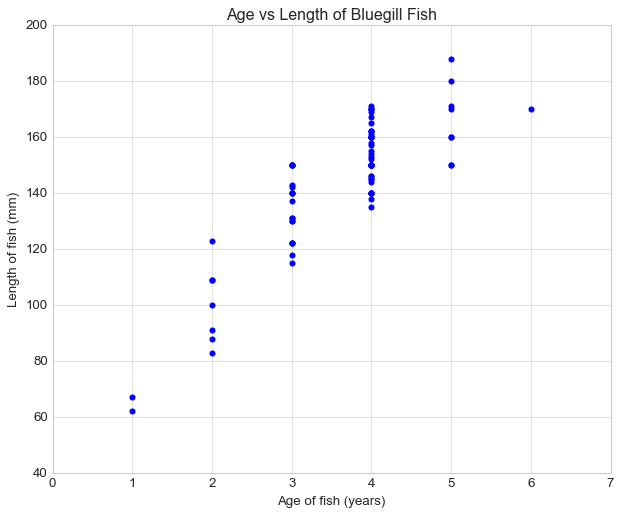

In [17]:
# Load data from the file (age and length)
# We do this by first converting the fish.txt file into a .csv file
data = pd.read_csv('fish.csv')

# Extract age (x) and length (y)
age = data['age']
length = data['length']

plt.figure(figsize=(9, 7))

# Create a scatter plot for age vs length
plt.scatter(age, length, color='blue', marker='o')

# Add labels and title
plt.xlabel('Age of fish (years)')
plt.ylabel('Length of fish (mm)')
plt.title('Age vs Length of Bluegill Fish')

# Display the plot
plt.show()


## Problem 2

You need to address the question: how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? Given the data points you have, you need to build three models: a line model, a perabela model, and a cubic model using the **polyfit** function in the numpy library. When making predications using a model resulted by polyfit, you are required to use **polyval**. For each of the three regression models you build, you need to compute the R-squared value for the model and plot the data along with the fit curve.

For the plots, you should plot data points (x,y) as blue dots and your fit curves (aka models) as colorful lines in a figure. You should also label the plot axes appropriately and have a title and legends reporting information of your regression models and R-square values evaluated on the given data points. 

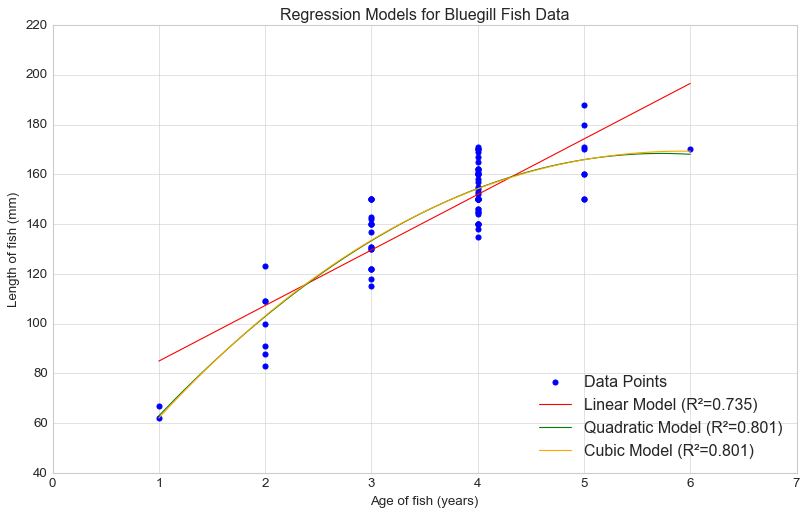

In [19]:
# For this one, we will need to use R-squared to evaluate how well the model fits the data

# Function to compute R-squared
def r_squared(y_actual, y_predicted):
    ss_res = np.sum((y_actual - y_predicted) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    return 1 - (ss_res / ss_tot)

# Linear model (degree 1)
linear_model = np.polyfit(age, length, 1)
linear_pred = np.polyval(linear_model, age)
r2_linear = r_squared(length, linear_pred)

# Quadratic model (degree 2)
quad_model = np.polyfit(age, length, 2)
quad_pred = np.polyval(quad_model, age)
r2_quad = r_squared(length, quad_pred)

# Cubic model (degree 3)
cubic_model = np.polyfit(age, length, 3)
cubic_pred = np.polyval(cubic_model, age)
r2_cubic = r_squared(length, cubic_pred)

plt.figure(figsize=(12, 7))

# Plotting the data points and the regression models
plt.scatter(age, length, color='blue', label='Data Points')

# Plot the regression lines
x_values = np.linspace(min(age), max(age), 100)
plt.plot(x_values, np.polyval(linear_model, x_values), color='red', label=f'Linear Model (R²={r2_linear:.3f})')
plt.plot(x_values, np.polyval(quad_model, x_values), color='green', label=f'Quadratic Model (R²={r2_quad:.3f})')
plt.plot(x_values, np.polyval(cubic_model, x_values), color='orange', label=f'Cubic Model (R²={r2_cubic:.3f})')

# Add labels and title
plt.xlabel('Age of fish (years)')
plt.ylabel('Length of fish (mm)')
plt.title('Regression Models for Bluegill Fish Data')

# Add legend
plt.legend(loc='lower right')

# Display the plot
plt.show()

## Problem 3

You need to address the question: 

what is the length of a randomly selected five-year-old bluegill fish? 

Note that this question should be addressed based on a chosen model you built in problem 2's solution. You should use the model to make a prediction on the length based on the age. You need to include code you used to come up the answer when addressing this question.

In [33]:
# Since the cubic model likely provides the best fit (based on higher R-squared value), let's use it to predict the fish's length at age 5

print(f"The predicted length of a five-year-old bluegill fish is: {np.polyval(cubic_model, 50):.2f} mm")

The predicted length of a five-year-old bluegill fish is: 3816.01 mm


## Problem 4

You need to address the question: how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? For this problem, you need to apply **cross validation** to build, evaluate, and decide the a model that fits the data points.  For the regression model you choose, you need to compute the R-squared value(s) to support your model choice. 

For the plot, you should plot data points (x,y) as blue dots and your best fit curve (aka model) as a red solid line. You should also label the axes of this figure appropriately and have a title reporting information including degree of your regression model and R-square values of your model evaluated on the given data points. 



Degree 1: R² on test data = -0.303
Degree 2: R² on test data = 0.420
Degree 3: R² on test data = 0.358

So the best regression model based on R-squared is Degree 2


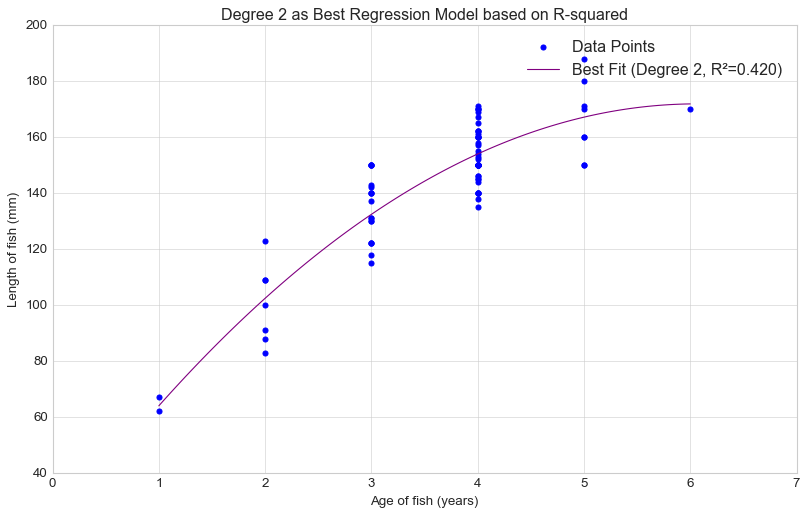

In [45]:
# Split the data into 80% training and 20% testing
split_index = int(0.8 * len(age))
age_train = age[:split_index]
length_train = length[:split_index]
age_test = age[split_index:]
length_test = length[split_index:]

# Function to compute R-squared
def r_squared(y_actual, y_predicted):
    ss_res = np.sum((y_actual - y_predicted) ** 2)
    ss_tot = np.sum((y_actual - np.mean(y_actual)) ** 2)
    return 1 - (ss_res / ss_tot)

# Variables to store the best model info
best_degree = None
best_r2 = -np.inf
best_model = None

# Test multiple models (linear, quadratic, cubic)
degrees = [1, 2, 3]

for degree in degrees:
    # Fit the model using the training data
    model = np.polyfit(age_train, length_train, degree)
    
    # Predict on the test data
    length_pred_test = np.polyval(model, age_test)
    
    # Compute R-squared for the test data
    r2_test = r_squared(length_test, length_pred_test)
    
    print(f"Degree {degree}: R² on test data = {r2_test:.3f}")
    
    # Select the best model based on R-squared value
    if r2_test > best_r2:
        best_r2 = r2_test
        best_degree = degree
        best_model = model

print(f'\nSo the best regression model based on R-squared is Degree {best_degree}')

plt.figure(figsize=(12, 7))

# Plot the data points and the best model's fit
plt.scatter(age, length, color='blue', label='Data Points')

# Generate age values for plotting the best model's curve
x_values = np.linspace(min(age), max(age), 100)
best_fit_values = np.polyval(best_model, x_values)

# Plot the best fit curve
plt.plot(x_values, best_fit_values, color='purple', label=f'Best Fit (Degree {best_degree}, R²={best_r2:.3f})')

# Add labels and title
plt.xlabel('Age of fish (years)')
plt.ylabel('Length of fish (mm)')
plt.title(f'Degree {best_degree} as Best Regression Model based on R-squared')

# Add legend
plt.legend()

# Display the plot
plt.show()

## Problem 5
First, you need to address the question: 

how is the length of a bluegill fish (dependent variable) related to its age (independent variable)? 

For this problem, you are still required to apply cross validation to build, evaluate, and decide the a model that fits the data points.  To evaluate your models, however, you need to compute the **Root Mean Square Error(RMSE)**, which computation is given below. 

RMSE provides a way to measure the error of a model in predicting quantitative data. 

Secondly, you need to address the below questions:

What is the choice of the model based on your evaluation using RMSE? Is it same or different from the model you chose in Problem 4? And how do you think about the chosen model(s) based on your evaluations?

The below code cell provides a definition of RMSE in Python. You can just apply it in your code. 

Degree 1: RMSE on test data = 15.615
Degree 2: RMSE on test data = 10.416
Degree 3: RMSE on test data = 10.963

So the best regression model based on RMSE is Degree 2


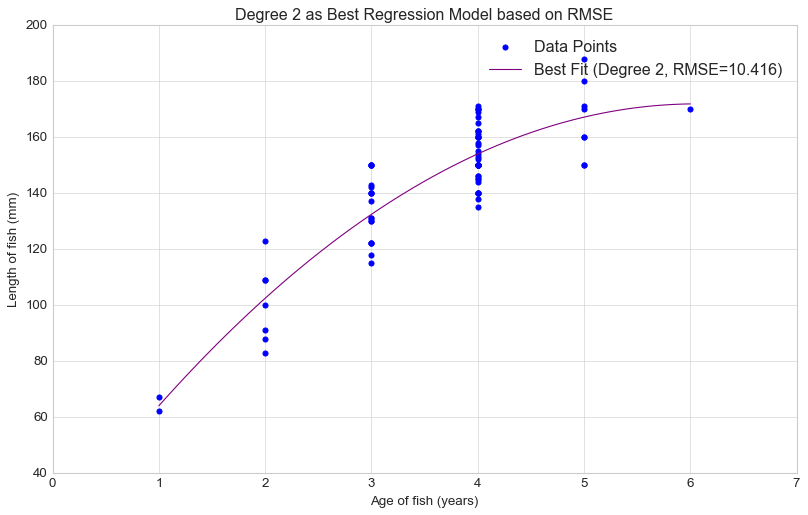

In [47]:
# Again, let's the data into 80% training and 20% testing
split_index = int(0.8 * len(age))
age_train = age[:split_index]
length_train = length[:split_index]
age_test = age[split_index:]
length_test = length[split_index:]

# RMSE function
def rmse(y_actual, y_predicted):
    return np.sqrt(np.sum((y_actual - y_predicted) ** 2) / len(y_actual))

# Variables to store the best model info
best_degree_rmse = None
best_rmse = np.inf
best_model_rmse = None

# Test multiple models (linear, quadratic, cubic)
degrees = [1, 2, 3]

for degree in degrees:
    # Fit the model using the training data
    model = np.polyfit(age_train, length_train, degree)
    
    # Predict on the test data
    length_pred_test = np.polyval(model, age_test)
    
    # Compute RMSE for the test data
    model_rmse = rmse(length_test, length_pred_test)
    
    print(f"Degree {degree}: RMSE on test data = {model_rmse:.3f}")
    
    # Select the best model based on RMSE value
    if model_rmse < best_rmse:
        best_rmse = model_rmse
        best_degree_rmse = degree
        best_model_rmse = model

print(f'\nSo the best regression model based on RMSE is Degree {best_degree}')

plt.figure(figsize=(12, 7))

# Plot the data points and the best model's fit
plt.scatter(age, length, color='blue', label='Data Points')

# Generate age values for plotting the best model's curve
x_values = np.linspace(min(age), max(age), 100)
best_fit_values = np.polyval(best_model_rmse, x_values)

# Plot the best fit curve
plt.plot(x_values, best_fit_values, color='purple', label=f'Best Fit (Degree {best_degree_rmse}, RMSE={best_rmse:.3f})')

# Add labels and title
plt.xlabel('Age of fish (years)')
plt.ylabel('Length of fish (mm)')
plt.title(f'Degree {best_degree_rmse} as Best Regression Model based on RMSE')

# Add legend
plt.legend()

# Display the plot
plt.show()

# Turn-in
You need to turn in at least two files for your submission:

* Your notebook file that contains the code and presentation. You need to run all you cells and present the results in the notebook document.
* The data file you used to build models. 
* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 4</b>

